# The 6 tasks of lecture 14; course CDSP

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Task 1
------
Mission: 1
--

In [21]:
df = pd.read_csv("sendy_logistics.csv")
df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [22]:
import json
import requests

api_key = "f200ff6c147b5731f8c5e629741c49b3"
# temperature metirc is in metric means Celsius
url2 = f"http://api.openweathermap.org/data/2.5/weather?country=Egypt,Cairo&lang=ar&units=metric&appid={api_key}&q=Cairo"

response = requests.get(url2)
weather = response.json()


In [29]:
weather["name"]

'القاهرة'

In [28]:
def temp_differ(x):
    # current temperature in Celsius differ from temperature column
    return x - weather["main"]["temp"]

df["Tim_Diff"] = df["Temperature"].apply(temp_differ)
df["Tim_Diff"].head(5).to_frame()

,Tim_Diff
0,-0.02
1,5.98
2,NaN
3,-1.22
4,-5.02


mission: 2
--

In [26]:
# to convert Celsius to Fahrenheit
df["Fehr_Temp"] = df["Temperature"].apply(lambda X: 1.8 * X + 32)
df["Fehr_Temp"].head().to_frame()

,Fehr_Temp
0,68.72
1,79.52
2,NaN
3,66.56
4,59.72


Task 2
---------


In [10]:
df=pd.read_csv("ufo.csv")
df.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


mission: 1
---

In [11]:
df["Time"] = pd.to_datetime(df["Time"], format="%m/%d/%Y %H:%M")
df["month"] = df["Time"].dt.month_name()
df["IN_December"] = df["month"].apply(lambda x: 1 if x =="December" else 0)
df["IN_December"].unique()

array([0, 1], dtype=int64)

mission: 2
--

In [12]:
from datetime import datetime
import numpy as np
df.head(1)

,City,Colors Reported,Shape Reported,State,Time,month,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June,0


In [13]:
# July 28, 1914'
df["years"] = df["Time"].dt.year

# year, month, day
df["Time_Diff_From_WW1"] = (datetime(1914, 7, 28) - df["Time"]) / np.timedelta64(1, "Y")

Task 3
----------

In [14]:
df = pd.read_csv("titanic_full.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


mission: 1
--

In [15]:
def return_title(x):
    splitter = x.split()[1]
    if splitter == "Mr.":
        return "Mr"
    elif splitter == "Miss.":
        return "Miss"
    elif splitter == "Mrs.":
        return "Mrs"
    
df["Title"] = df["Name"].apply(return_title)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', None], dtype=object)

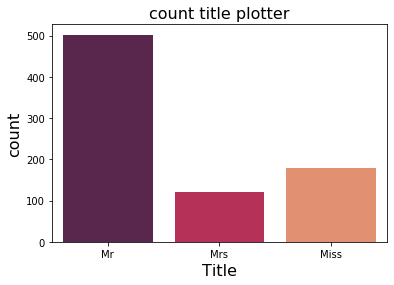

In [16]:
sns.countplot(df["Title"], palette="rocket")
plt.title("count title plotter", fontsize=16)
plt.xlabel("Title", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

mission: 2
--

In [17]:
df = pd.read_csv("sendy_logistics.csv")
df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [18]:
df["id"] = df["User Id"].apply(lambda x : x.split("_")[2])
df["id"].to_frame().head()

,id
0,633
1,2285
2,265
3,1402
4,1737


Task 4
------------

mission: 1
--

In [19]:
import user_agents

In [20]:
df = pd.read_csv("visitor-interests.csv")
df.head(3)

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website


In [23]:
def get_details(x):
    response = user_agents.parse(x)
    return pd.Series((response.browser.family, response.os.family, response.device.family))
    
df[["Browser family", "OS family", "Device family"]] = df["UserAgent"][:50].apply(get_details)

# another details from UserAgent (addtional columns)
def get_versions(x):
    response = user_agents.parse(x)
    return pd.Series((response.browser.version_string, response.os.version_string, response.device.brand))

df[["Browser version", "OS version", "Device brand"]] = df["UserAgent"][:50].apply(get_versions)

In [24]:

df[["Browser family", "OS family", "Device family"]].head(10)

,Browser family,OS family,Device family
0,Chrome,Windows,Other
1,Chrome,Windows,Other
2,Chrome,Windows,Other
3,Chrome,Android,Nexus 9
4,Mobile Safari,iOS,iPad
5,Samsung Internet,Android,Samsung SM-G900I
6,Samsung Internet,Android,Samsung SM-G900I
7,IE,Windows,Other
8,Firefox,Mac OS X,Mac
9,Mobile Safari,iOS,iPhone


In [25]:
# addtional code
df[["Browser version", "OS version", "Device brand"]].head(10)

,Browser version,OS version,Device brand
0,53.0.2785,7,None
1,52.0.2743,10,None
2,52.0.2743,7,None
3,52.0.2743,7.0,Generic_Android_Tablet
4,9.0,9.3.5,Apple
5,2.1,5.0,Samsung
6,4.0,5.0,Samsung
7,11.0,8.1,None
8,48.0,10.11,Apple
9,7.0,7.0.4,Apple


mission: 2
--

In [26]:
df.head(2)
df.iloc[5]

IP                                                      1.124.48.210
UserAgent          Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...
Country                                                           AU
Languages                                                    english
Interests                                                    company
Browser family                                      Samsung Internet
OS family                                                    Android
Device family                                       Samsung SM-G900I
Browser version                                                  2.1
OS version                                                       5.0
Device brand                                                 Samsung
Name: 5, dtype: object

In [27]:
from ip2geotools.databases.noncommercial import DbIpCity

response = DbIpCity.get("1.124.48.210", api_key='free')

df = df.sample(50, random_state=42)

print(response.latitude)
print(response.longitude)

-34.9281805
138.5999312


In [28]:
def get_lat_long(x):
    try:
        response = DbIpCity.get(x, api_key='free')
        return pd.Series((response.latitude, response.longitude))
    except:
        return "None"
    
df[["latitude","longitude"]] = df["IP"].apply(get_lat_long)

In [97]:
df[["latitude","longitude"]].head(5)

,latitude,longitude
17212,17.500054,-88.200311
9895,NaN,NaN
15340,38.750949,-77.475267
4441,34.053691,-118.242766
5762,40.712728,-74.006015


Task 5
--------
mission: 1
--

In [29]:
df = pd.read_csv("visitor-interests.csv")

# make a sample of 50 rows
sample2 = df[df["Country"] == "EG"].sample(50, replace=True)

# get latitude and lonitude from sample2 created from original df
sample2[["latitude", "longitude"]] = sample2["IP"].apply(get_lat_long)
# print the shape of sample2
print(sample2[sample2["Country"] == "EG"].shape)

(50, 7)


In [30]:
from geopy.distance import great_circle


def distance_differ(x):
    # 30.033333, 31.233334 is the distance from Egypt 
    # x["latitude"], x["longitude"] is a sample of Egypt distance from different places
    distances = great_circle((30.033333, 31.233334),(x["latitude"], x["longitude"]))
    return distances

# try an example
distance_differ(sample2[["latitude","longitude"]].iloc[0])

Distance(182.25421103568635)

In [31]:
# apply function takes every row and apply distance_differ on it.

sample2["Dist_From_Egypt"] = sample2[["latitude", "longitude"]].apply(distance_differ, axis=1)
sample2["Dist_From_Egypt"]

2144     182.25421103568635 km
17894     36.74915807836989 km
17894     36.74915807836989 km
18164     5.545597356524842 km
18167    1.2506240354116147 km
2227     4270.2208278729495 km
2377      5.545597356524842 km
17995    112.62501624660003 km
18167    1.2506240354116147 km
18064    1.2506240354116147 km
18163     5.545597356524842 km
2232      4270.110987180188 km
2349      36.74915807836989 km
2149     182.25421103568635 km
2143     182.25421103568635 km
18064    1.2506240354116147 km
17894     36.74915807836989 km
2148     182.25421103568635 km
2378      5.545597356524842 km
2143     182.25421103568635 km
2147     182.25421103568635 km
2231     4270.2208278729495 km
2147     182.25421103568635 km
2145     182.25421103568635 km
17993    1.2506240354116147 km
2376      5.545597356524842 km
18166    1.2506240354116147 km
2377      5.545597356524842 km
2149     182.25421103568635 km
2150     1.2506240354116147 km
2235      4269.692022076106 km
2379      5.545597356524842 km
2347    

Task 6
----------------

mission: 1
--

In [110]:
df = pd.read_csv("Restaurant_Reviews.csv",sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [139]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(df["Review"])

countVect_frame = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())
countVect_frame.head(5)

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# an example
df.iloc[8]
countVect_frame["great"][8]

1

mission: 2
--

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()
frequency_vectors = tf_vectorizer.fit_transform(df["Review"])

frequency_frame = pd.DataFrame(frequency_vectors.toarray(), columns= tf_vectorizer.get_feature_names())
frequency_frame.head(5)

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# create an example
df.iloc[8]
frequency_frame["great"][8]

0.3920560761173046